### Lectura de los textos

In [1]:
##preparar texto
##se prepara la lista glob que sirve para trabajar con carpetas
import glob
## se define que lista_files es una lista con los nombres de los archivos 
##los cuales están seleccionados como los txt que se encuentran dentro de primer periodo
lista_files = glob.glob('Primer periodo/*.txt')
##se define un diccionario donde en los keys se encuentran los nombres y en los values el texto
corpus = {}
##por cada archivo en la lista de archivos
for file in lista_files:
##este se abre con encoding utf-8 y queda definido como file_input
    with open(file, 'r', encoding="utf-8") as file_input:
##se toman los nombres de los textos y se le quitan los primeros 15 caracteres (el nombre de la carpeta)
        corpus[file[15:]]=file_input.read()
print('Nombre de los textos')
print(corpus.keys())    
##esto último con el objetivo de corroborar si el programa lee todos los textos de forma correcta

Nombre de los textos
dict_keys(['Catecismo Valdivia-Imperial.txt', 'Catecismo Valdivia-Santiago.txt', 'Confesionario Valdivia.txt', 'Oraciones Valdivia - Imperial.txt', 'Oraciones Valdivia-Santiago.txt', 'Sermón de Valdivia.txt', 'Textos Febrés.txt'])


### Preprocesamiento

In [2]:
##importamos string para la limpieza de los textos
import string

##abrimos una lista con números con el fin de poder eliminar de forma más fácil los caracteres numéricos
numeros= []
##cada uno de los números de este rango
for numero in list(range(100)):
    ##lo añadimos a una lista    
    numeros+= [numero]
##la cuál definimos como un string
numeros = str(numeros)
numeros

##generamos una def para eliminar los puntos
def remover_puntuacion(s):
    ##cada uno de los items que aparecen en esta lista
    for c in string.punctuation:
        ##es eliminado del texto reemplazandolo por un espacio vacío
        s=s.replace(c,"")
        ##lo mismo se hace con "\t"
        s=s.replace('\t','')
    return s

##última def de preparación
def remover_numeros(k):
    ##por cada item dentro de la lusta numeros
    for z in numeros:
        ##reemplazamos elitem de la lista con un vacío
        k=k.replace(z," ")
        ##también eliminamos la palabra "pag", usada para marcar páginas junto con lo anterior
        k=k.replace('pag','')
    return k

#toma el corpus subido y crea una lista vacía
corpus_misional = []
##por cada uno de los keys en corpus.keys se agrega a corpus_misional el value
for key in corpus.keys():
    corpus_misional += [corpus[key]]

## se hace un string para poner todos los values de corpus con el objetivo de trabajarlo como un solo texto grande
string_corpus_misional=' '.join(corpus_misional)

##Tomamos el string_corpus_misional y limpiamos una serie de impurezas típicas de la escritura en mapudungun y el trabajo con txt
##En primer lugar eliminamos los saltos de página marcados con "\n" y los marcados con "\t"
string_corpus_contextos = string_corpus_misional.replace('\n', ' ')
string_corpus_contextos = string_corpus_contextos.replace('\t', ' ')
##luego eliminamos [r], que simboliza la duda del escritor sobre la existencia de una "r" en esa posición
string_corpus_contextos = string_corpus_contextos.replace('[r]', 'r')
##eliminamos los marcadores de párrafo 
string_corpus_contextos = string_corpus_contextos.replace('¶', '')
##utilizamos ambas def para eliminar puntuaciones y números del texto
string_corpus_contextos = remover_numeros(string_corpus_contextos)
string_corpus_contextos = remover_puntuacion(string_corpus_contextos)
##eliminamos las marcas de pregunta y respuesta en el texto, las que son marcadas con una "P" y "R" en el corpus
string_corpus_contextos = string_corpus_contextos.replace('P ', '')
string_corpus_contextos = string_corpus_contextos.replace('R ', '')
##eliminamos las mayúsculas y el exceso de espacios
string_corpus_contextos = string_corpus_contextos.lower()
string_corpus_contextos = string_corpus_contextos.strip()
##lista exclusiva para graficación
lista_corpus_contextos = string_corpus_contextos.split(' ')
##luego se usa .split para dividir el texto por \n
string_corpus_misional = string_corpus_misional.split('\n')

##Se define una lista como vacio para poder ingresar cada una de las oraciones del corpus sin espacios en blanco
vacio=[oracion for oracion in string_corpus_misional if len(oracion)>0]

##por cada una de estas oraciones en vacio se le saca la puntuación y se bajan las mayúsculas
sin_puntos = []
for oracion in vacio:
    oracion_limpia = remover_puntuacion(oracion)
    sin_puntos += [oracion_limpia.lower()]

##Se toma la lista palabras y luego se ingresan cada una de las palabras de oración que están separadas por comillas
palabras = []
for oracion in sin_puntos:
    palabras += [oracion.split(' ')]





# Oraciones con las palabras de interés

In [3]:
##este diccionario parte como lista para los posteriores y se usa en caso de que el texto sea divisible en oraciones
Yem_oraciones = {'yem':[],'ema':[],'em':[]} 

In [4]:
##en caso que sea posible una division por oraciones las siguientes líneas lo añadirían al diccionario
for oracion in palabras:
    for Y in Yem_oraciones.keys():
        if Y in oracion:
            Yem_oraciones[Y]+=[oracion]

In [5]:
## contamos el número de yem en las oraciones

Yem_repeticiones = {'yem':[],'ema':[],'em':[]} 

for Y in Yem_oraciones.keys():
    for oracion in Yem_oraciones[Y]:
        n = oracion.count(Y)
        Yem_repeticiones[Y]+=[(oracion,n)]

In [6]:
## función para detectar k palabras anteriores

def k_anteriores(oracion,Y,k):
    lista_contextos = []
    for i in range(len(oracion)):
        word = oracion[i]
        if word == Y:
            r = k
            for r in range(1,k+1):
                if i-r < 0:
                    r -= 1
            lista_contextos += [oracion[i-r:i]+[Y]]
    return lista_contextos

In [7]:
##definiremos un diccionario vacío para agregar solamente las palabras que aparecen antes de yem

diccionario_contextos_presentacion = {'yem':[],'ema':[],'em':[]} 

In [8]:
##añadiremos al diccionario anterior las apariciones de yem/em/ema y las cuatro palabras anteriores, consideramos que es un buen número de palabras para inferir el significado
lista_yem_presentacion = k_anteriores(lista_corpus_contextos,'yem',4)
lista_em_presentacion = k_anteriores(lista_corpus_contextos,'em',4)
lista_ema_presentacion = k_anteriores(lista_corpus_contextos,'ema',4)
diccionario_contextos_presentacion['yem'] = lista_yem_presentacion
diccionario_contextos_presentacion['em'] = lista_em_presentacion
diccionario_contextos_presentacion['ema'] = lista_ema_presentacion

In [9]:
##creamos por comodidad un diccionario que incluya solamente la palabra usada junto a yem/em/ema para poder estudiar su sintaxis
palabra_anterior_presentacion = {'yem':[],'ema':[],'em':[]} 

In [10]:
indices_yem = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'yem':
        indices_yem.append(palabra)
indices_em = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'em':
        indices_em.append(palabra)
indices_ema = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'ema':
        indices_ema.append(palabra)
Yem_indices = {'yem':[],'ema':[],'em':[]} 

Yem_indices['yem'] = indices_yem
Yem_indices['em'] = indices_em
Yem_indices['ema'] = indices_ema

In [11]:
Yem_indices['yem']

[13618,
 25604,
 26493,
 29999,
 30025,
 34488,
 34496,
 34505,
 34513,
 34545,
 34563,
 34582,
 34609,
 35350,
 36012,
 36424,
 40277,
 40379,
 44647]

In [12]:
print(lista_corpus_contextos[36000:36013])

['mi', 'duam', 'pi', '', 'eghipto', 'mithiculu', '', 'yevimi', 'ñampuy', '', 'jerusalem', 'mo', 'yem']


### Co-ocurrencias

In [13]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(text_clean):
    
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0

In [14]:
grafos = {}

for Y in diccionario_contextos_presentacion.keys():
    oraciones = diccionario_contextos_presentacion[Y]
    grafos[Y]=GoW(oraciones)

In [15]:
grafos['yem'].edges(data=True)

EdgeDataView([('vùcha', 'pu', {'weight': 1}), ('pu', 'calcu', {'weight': 1}), ('pu', 'que', {'weight': 1}), ('pu', 'che', {'weight': 1}), ('calcu', 'ga', {'weight': 1}), ('ga', 'yem', {'weight': 3}), ('ga', 'che', {'weight': 1}), ('ga', 'inchiñ', {'weight': 1}), ('yem', 'may', {'weight': 1}), ('yem', 'piuque', {'weight': 1}), ('yem', 'ñahue', {'weight': 1}), ('yem', 'ñuque', {'weight': 2}), ('yem', 'esposa', {'weight': 1}), ('yem', 'mlehue', {'weight': 1}), ('yem', 'maria', {'weight': 3}), ('yem', '', {'weight': 1}), ('yem', 'mo', {'weight': 2}), ('yem', 'christo', {'weight': 2}), ('yem', 'christiano', {'weight': 1}), ('ta', 'pegealu', {'weight': 1}), ('pegealu', 'inchiñ', {'weight': 1}), ('ple', '', {'weight': 1}), ('', 'deuma', {'weight': 1}), ('', 'rezaleaymi', {'weight': 1}), ('', '', {'weight': 1}), ('', 'ñampuy', {'weight': 1}), ('', 'jerusalem', {'weight': 1}), ('deuma', 'may', {'weight': 1}), ('lonco', 'em', {'weight': 1}), ('em', 'cùme', {'weight': 1}), ('cùme', 'piuque', {'we

In [16]:
import matplotlib.pyplot as plt

def plotG_centrality(Y,size):
    
    G = grafos[Y]
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    #G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:100]))[0]}
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = [size*x for x in list(centrality.values())], node_color='gold',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('red_{}.jpg'.format(Y), format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

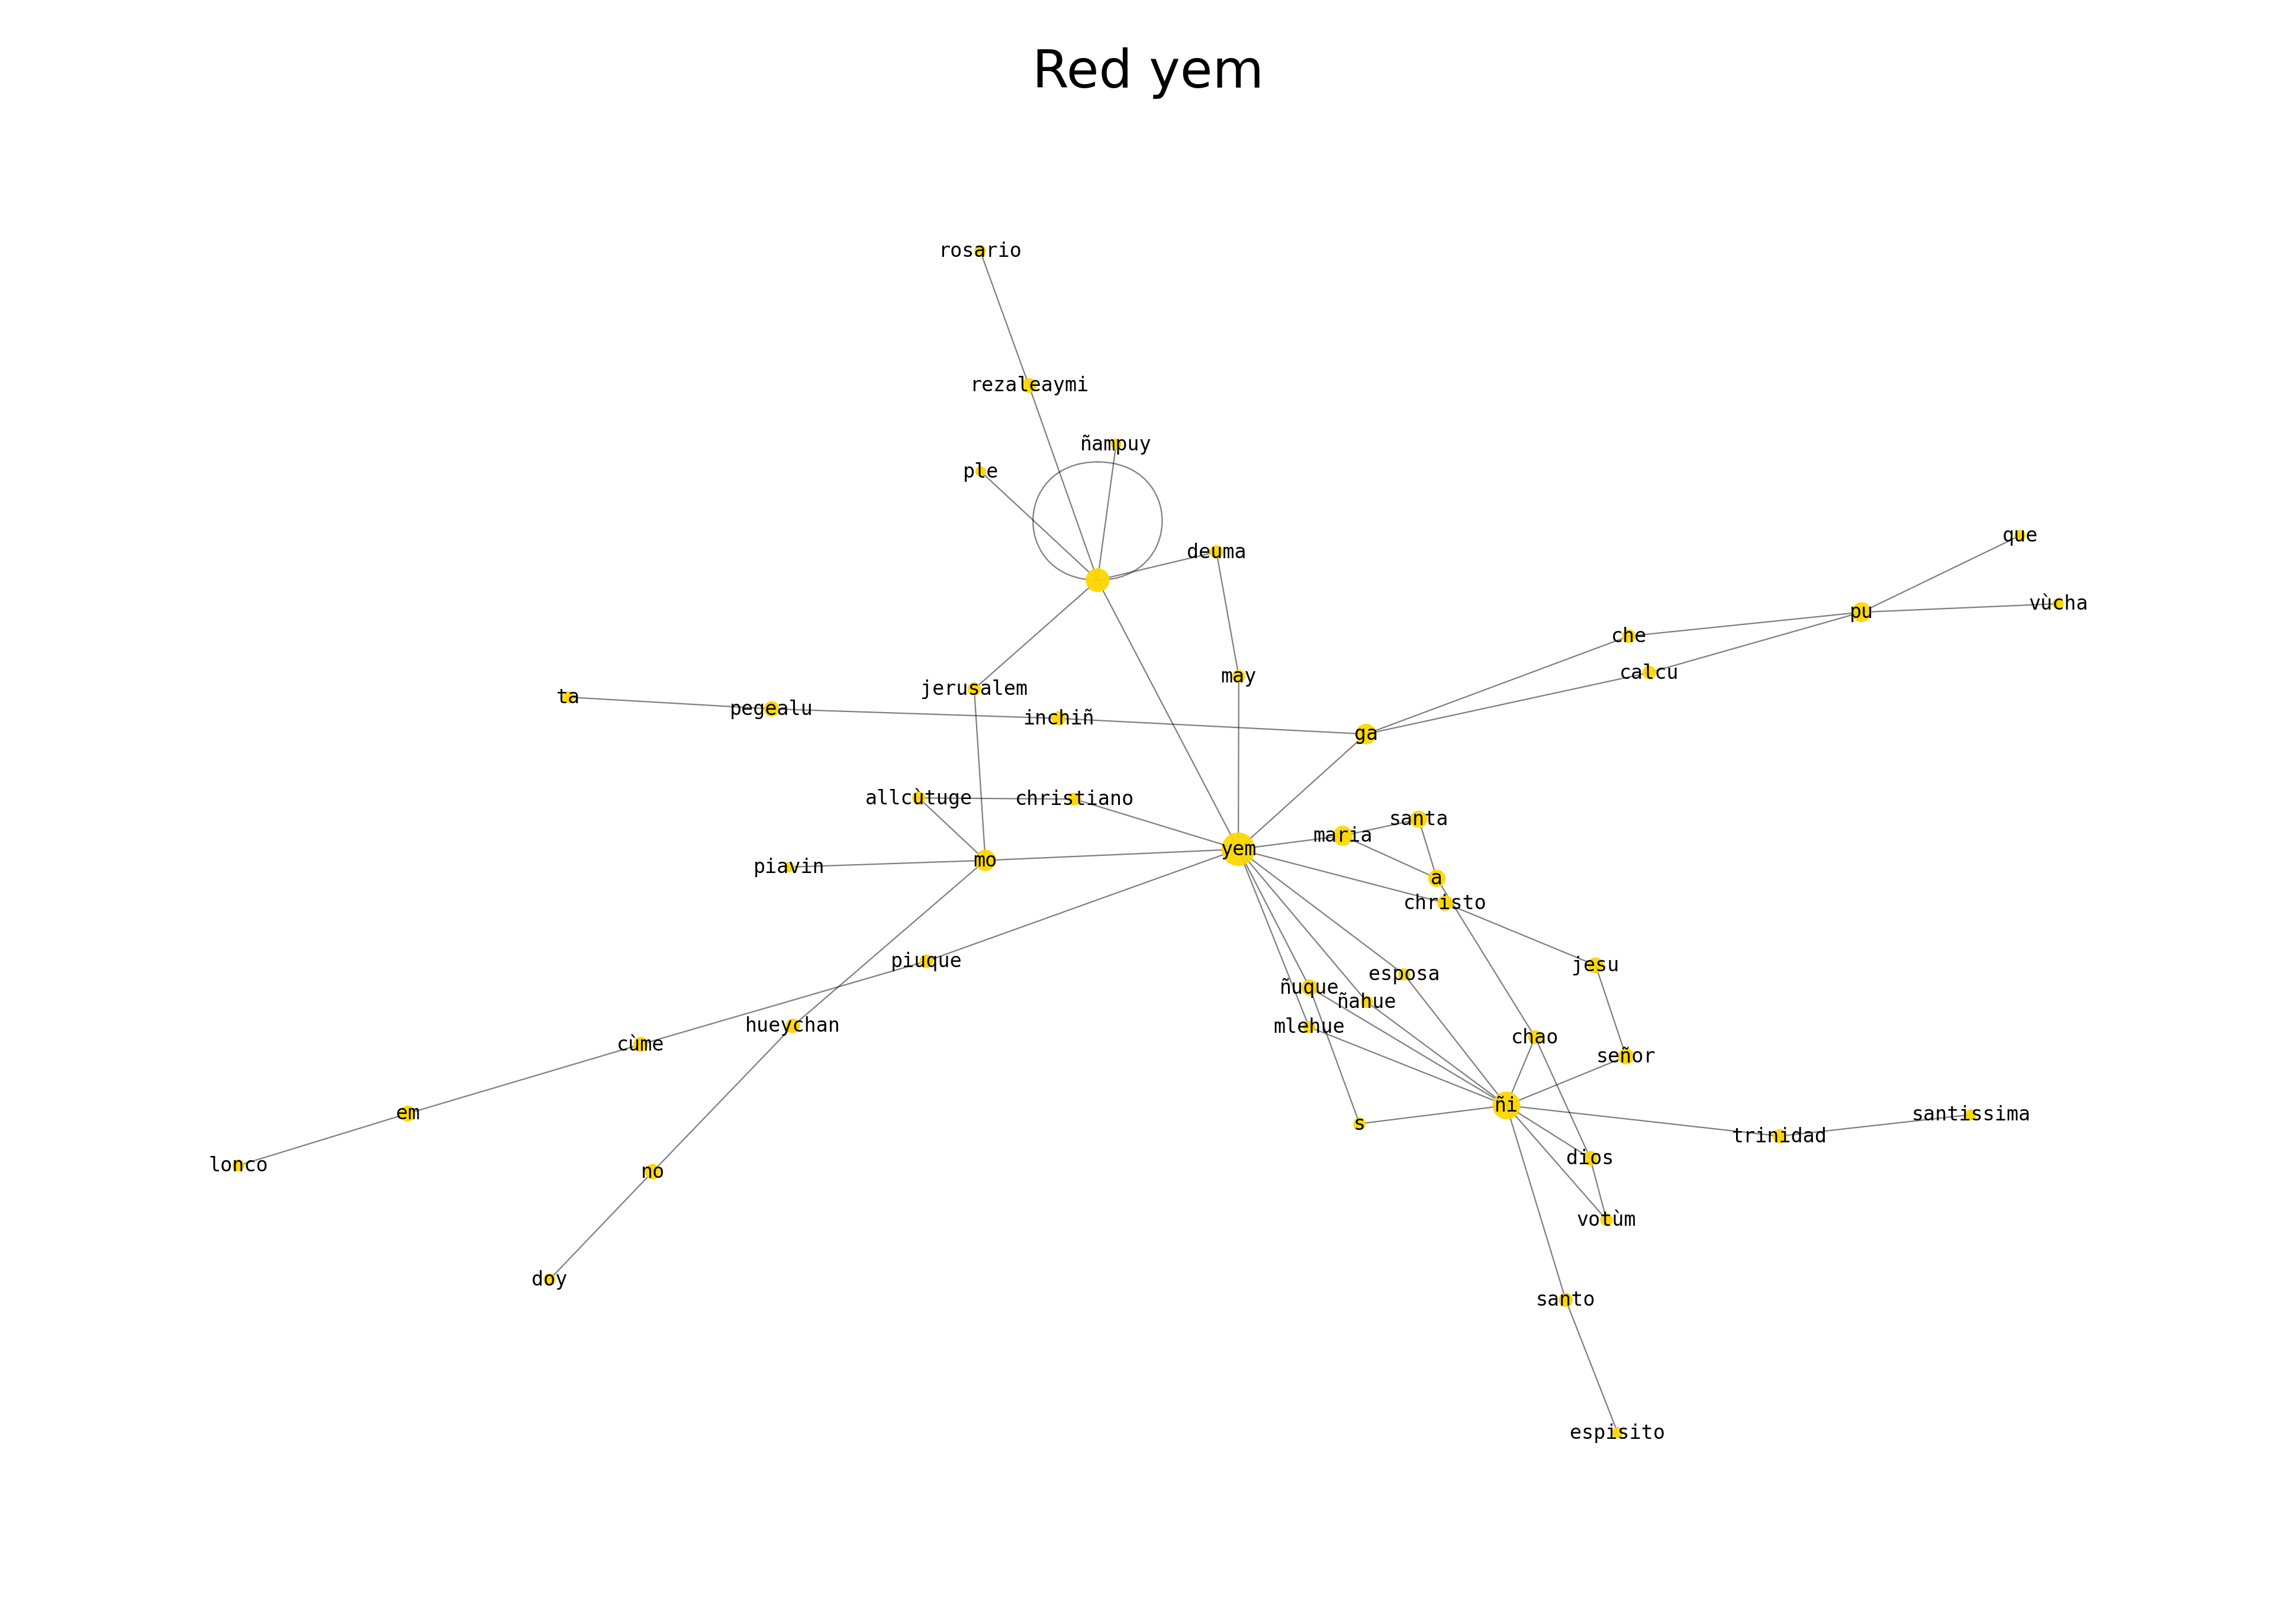

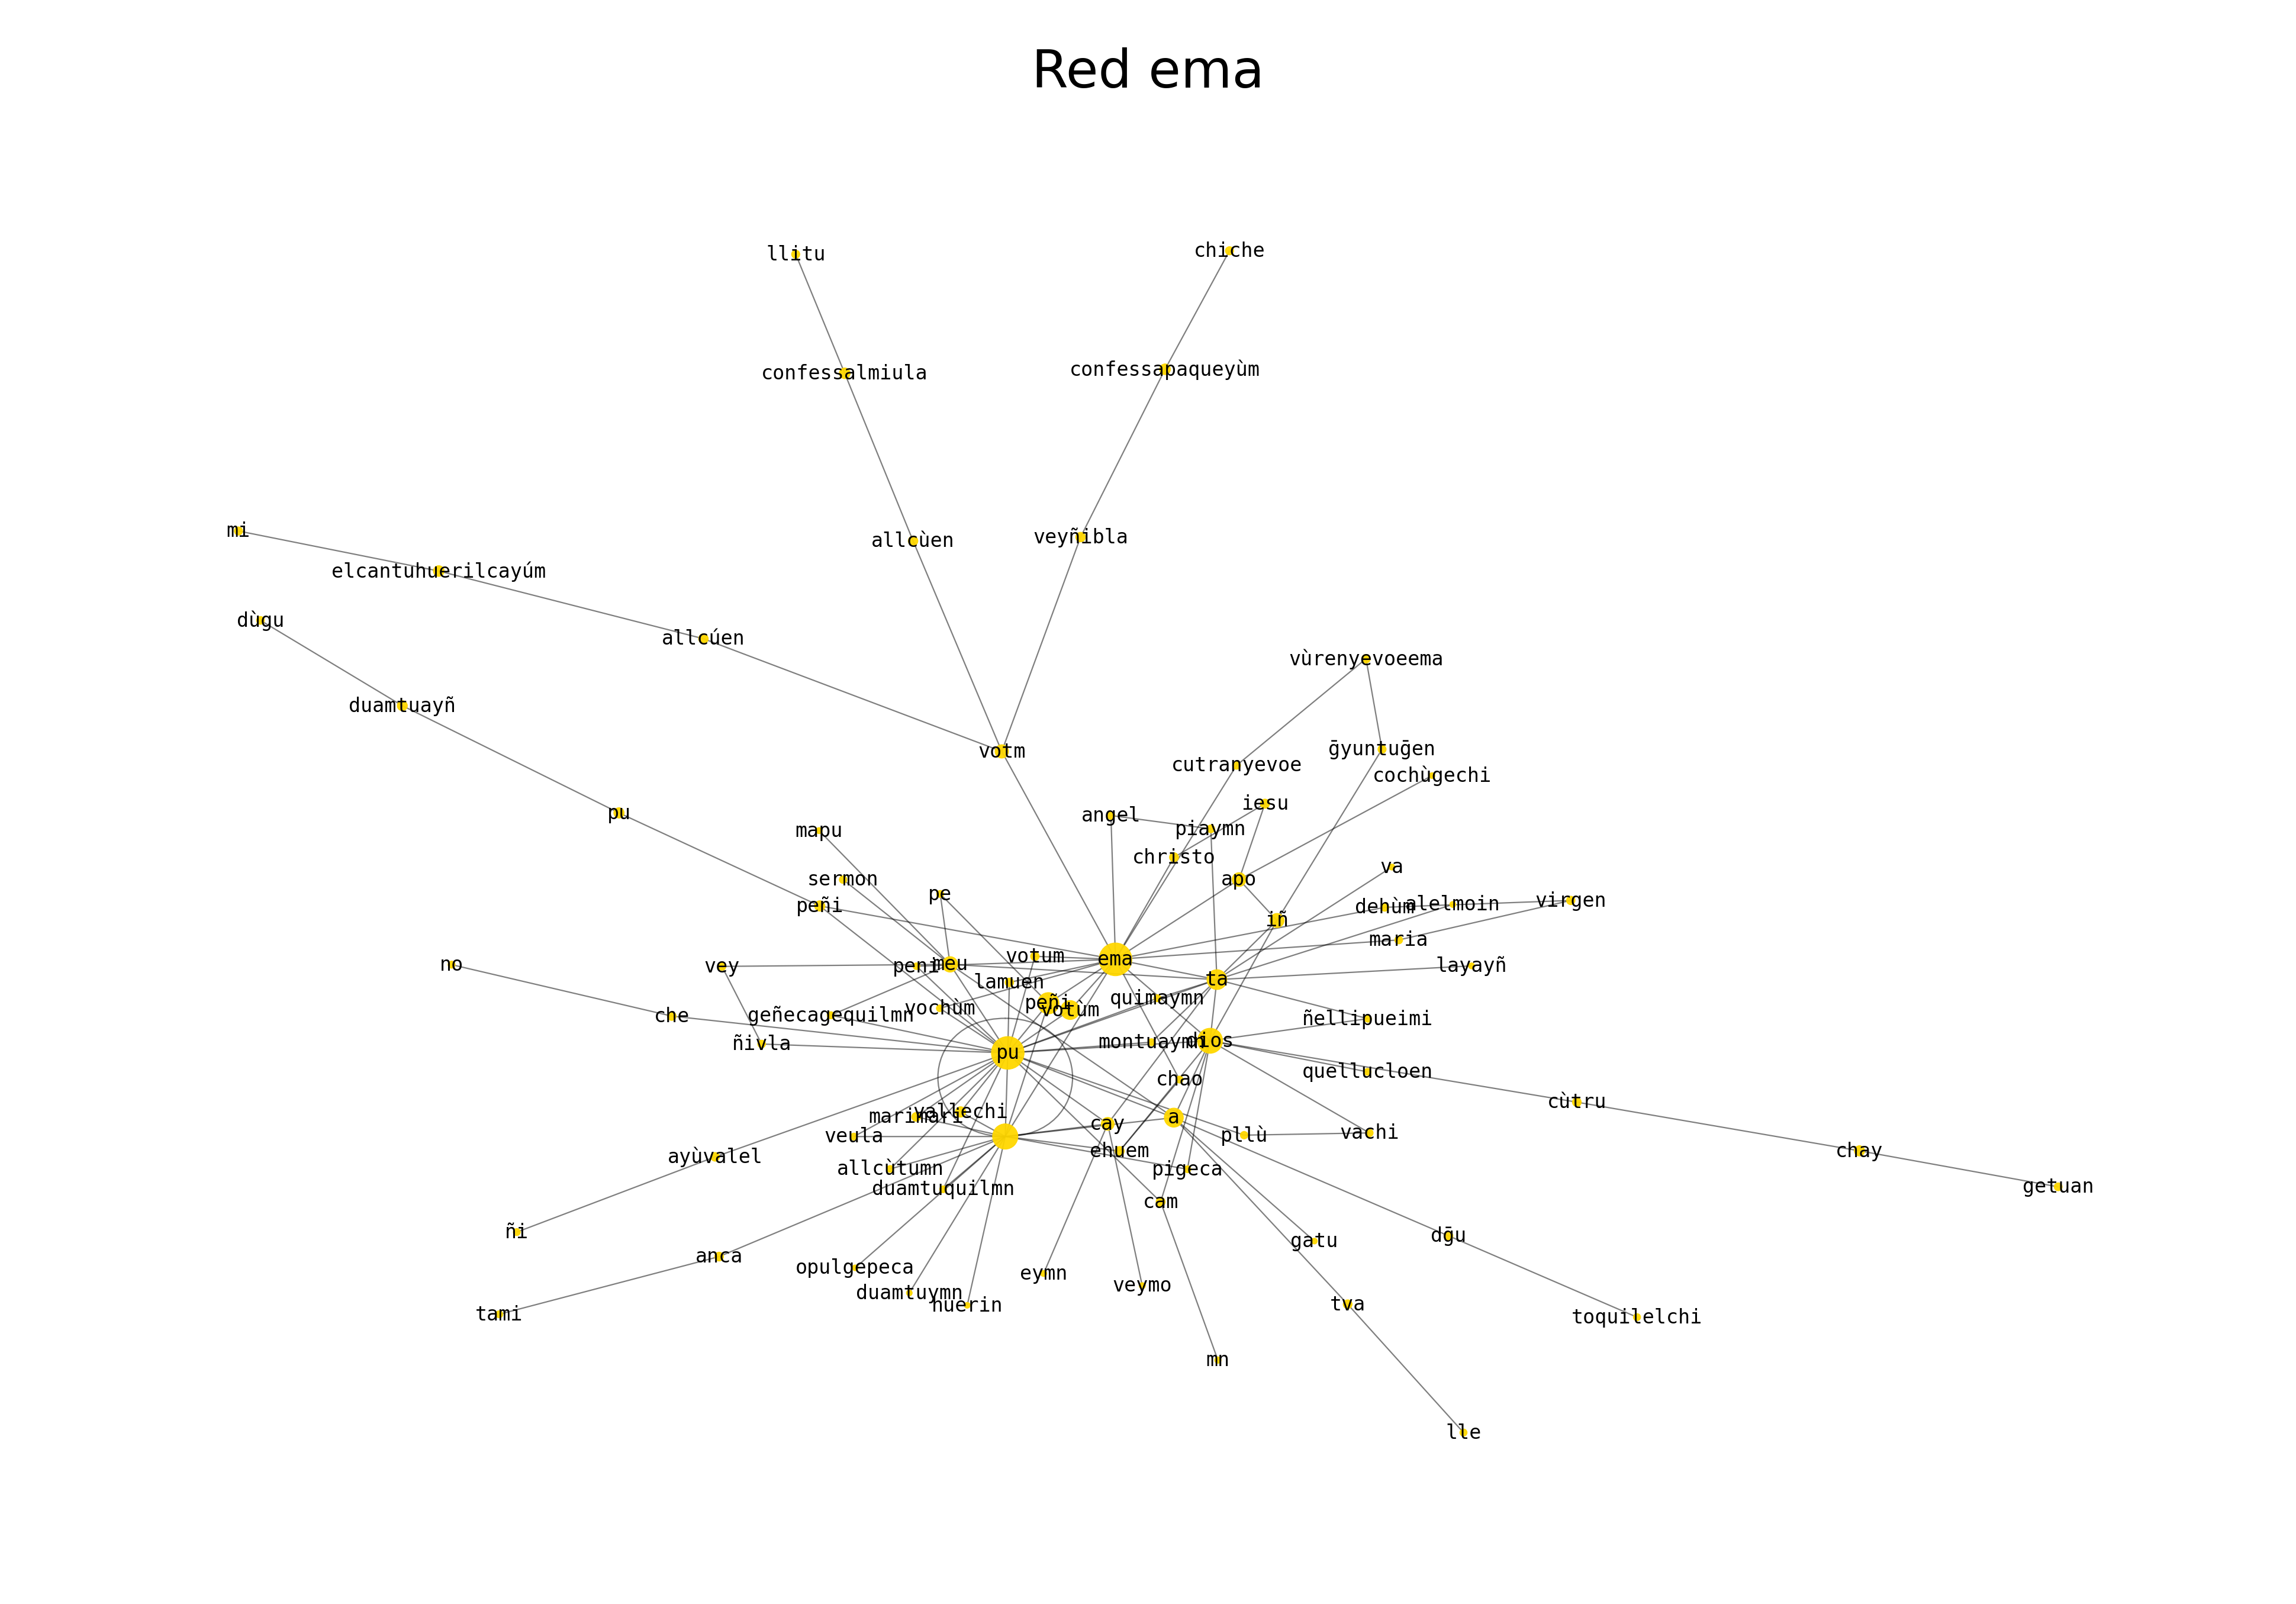

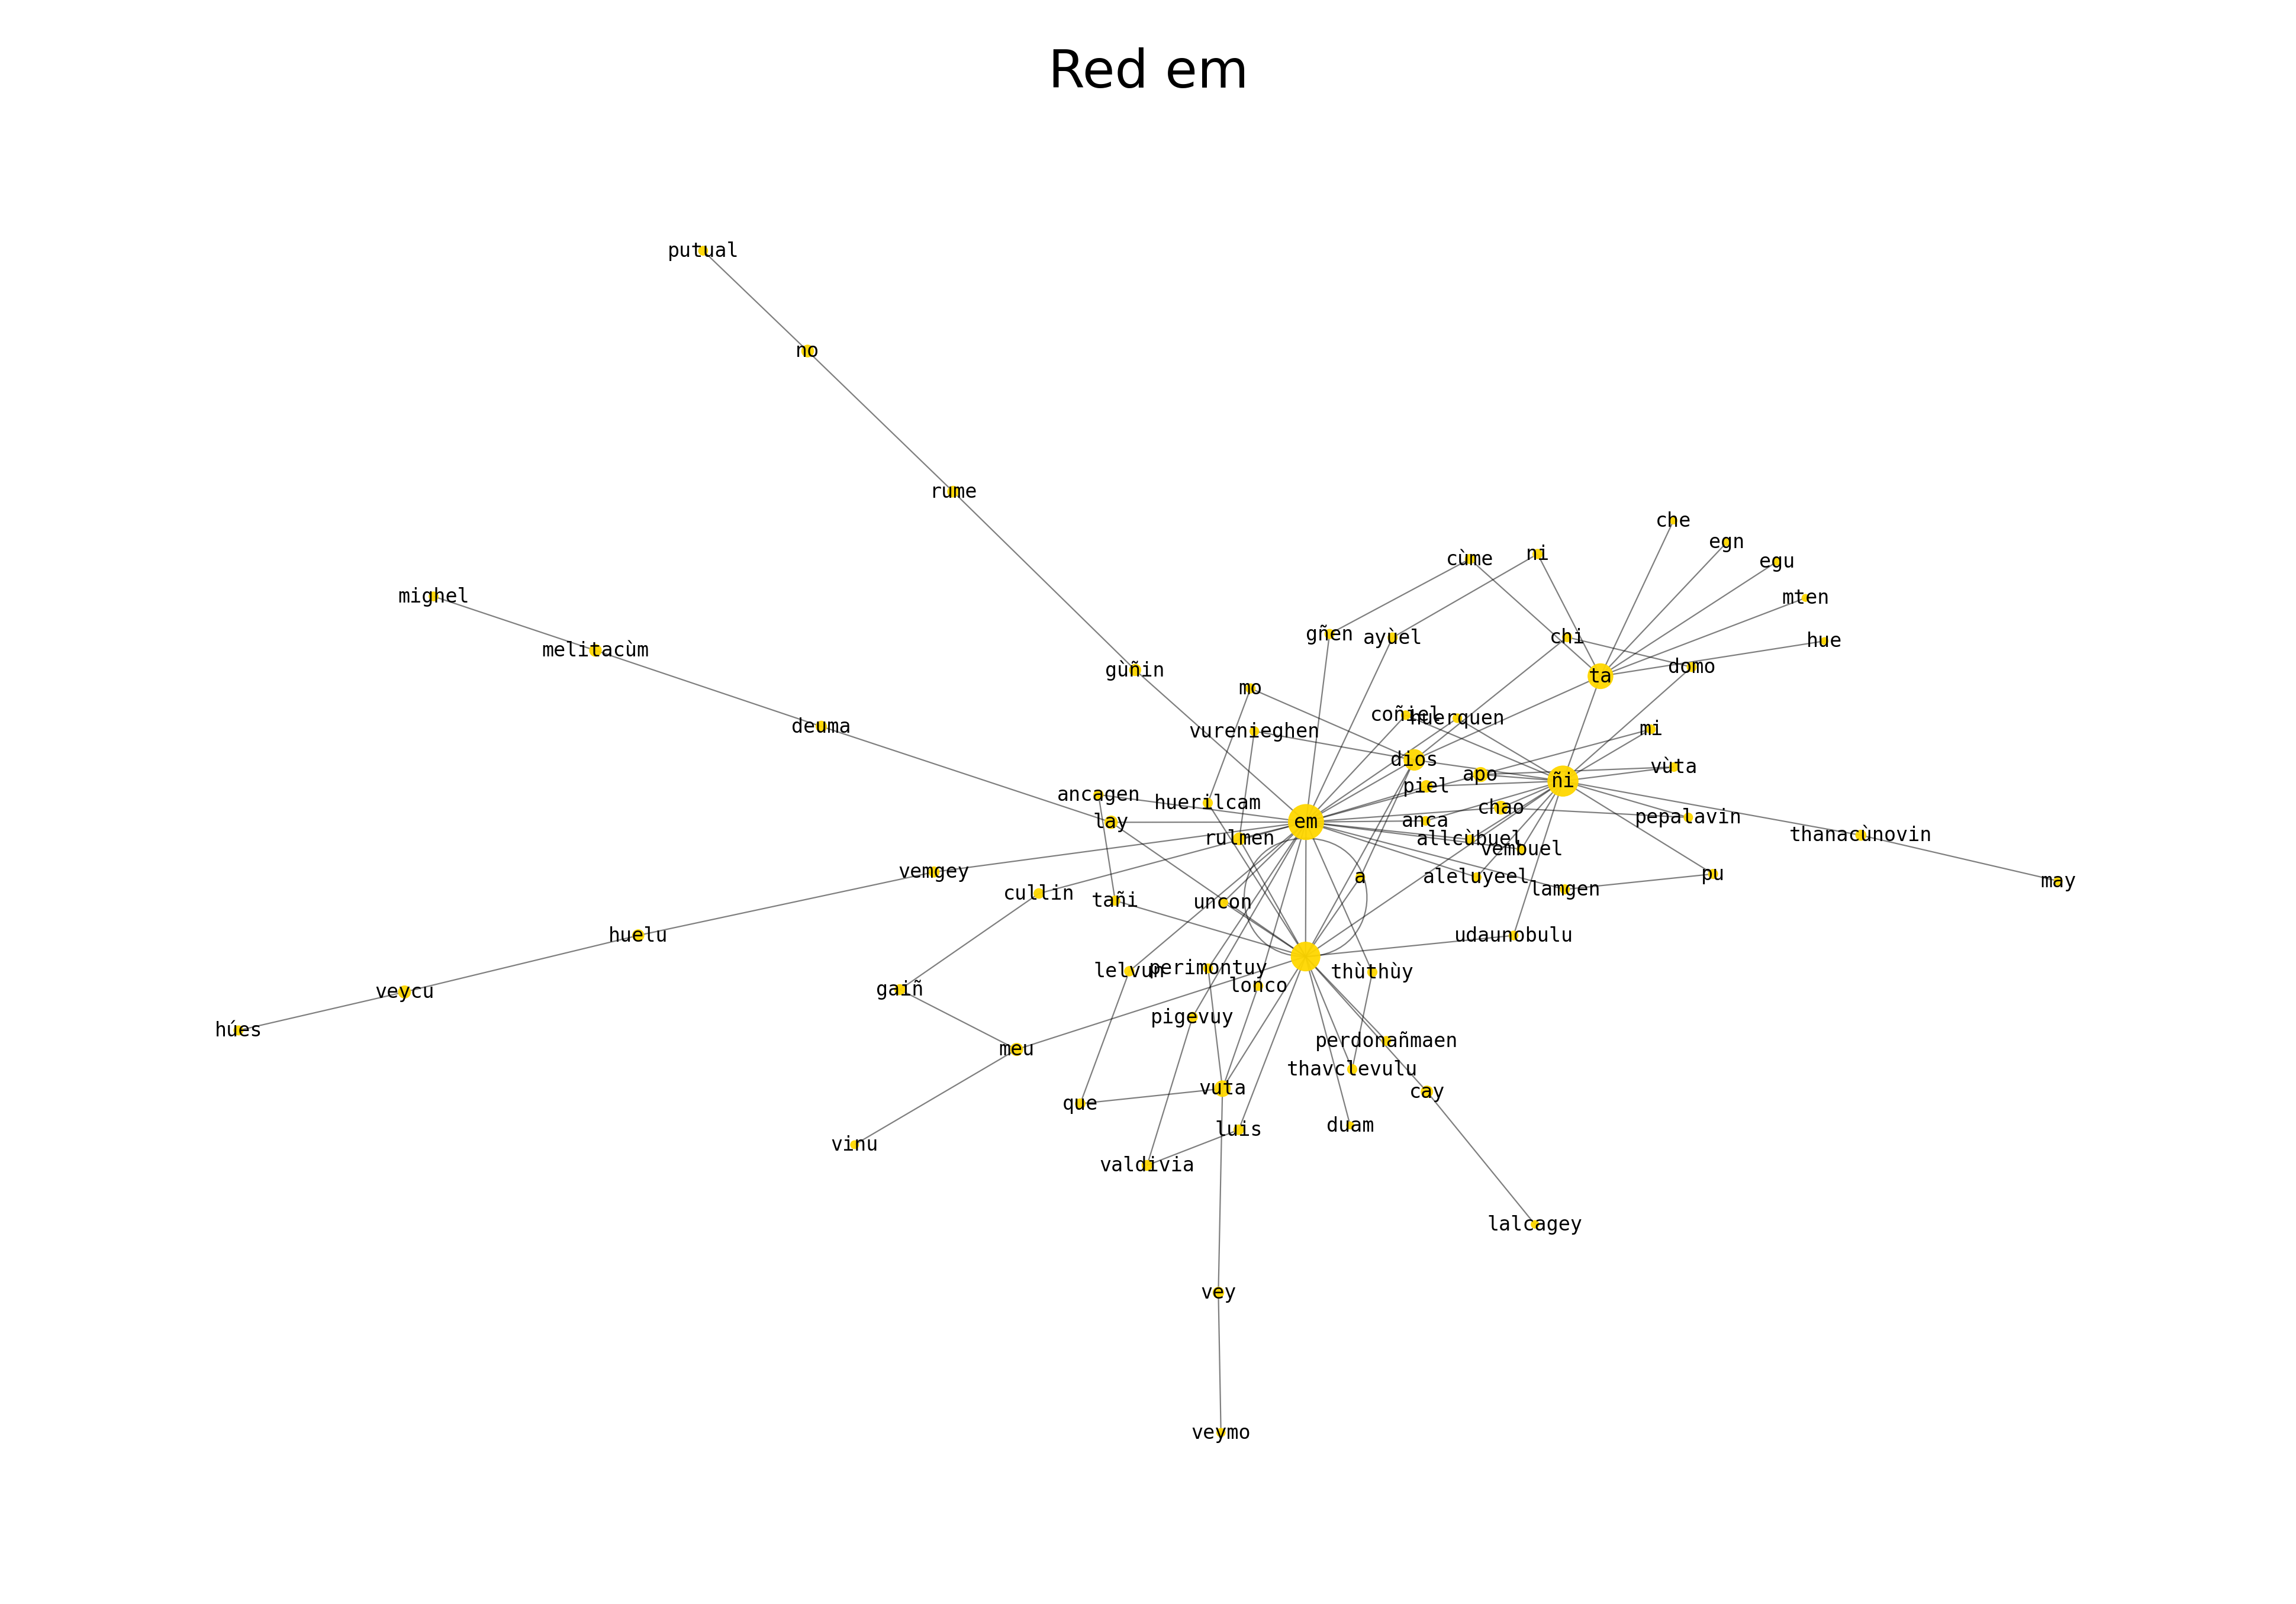

In [17]:
for Y in grafos.keys():
    plotG_centrality(Y,250)

In [18]:
## función para ranquear co-ocurrencias :)

def ranking(palabra,k):
    red = grafos[palabra]
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [19]:
## palabras más cercanas a -em en el corpus misional

for Y in grafos.keys():
    print(Y,ranking(Y,10))

yem ['ga', 'maria', 'ñuque', 'mo', 'christo', 'may', 'piuque', 'ñahue', 'esposa', 'mlehue']
ema ['dios', 'peñi', 'votùm', 'apo', 'votm', 'votum', '', 'lamuen', 'christo', 'cutranyevoe']
em ['dios', 'apo', 'piel', 'chao', 'lay', 'rulmen', 'gùñin', 'huerquen', 'anca', 'coñiel']


### Cálculos con el corpus

In [20]:
##Cuantificación

print('Resultados')
print('  ')  

print('Cantidad de oraciones')
print('  ')  
print(len(palabras))
print('  ')  

print('Cantidad de palabras')


tokens = []
for oracion in palabras:
    for palabra in oracion:
        tokens += [palabra]
print(len(tokens))
print('  ')     


print('Cantidad de palabras únicas')


print(len(set(tokens)))
print('  ')     

print('relación')
    

print(len(set(tokens))/len(tokens))
print('  ')     

#contabilizar yem

Yem = {'yem':0,'ema':0,'em':0} 
for key in Yem.keys():
    Yem[key]=tokens.count(key)

print('Cantidad de yem')
 

print(Yem)

Resultados
  
Cantidad de oraciones
  
3738
  
Cantidad de palabras
39906
  
Cantidad de palabras únicas
8029
  
relación
0.2011978148649326
  
Cantidad de yem
{'yem': 19, 'ema': 60, 'em': 33}


In [21]:
diccionario_contextos_presentacion['yem']

[['vùcha', 'pu', 'calcu', 'ga', 'yem'],
 ['que', 'pu', 'che', 'ga', 'yem'],
 ['ta', 'pegealu', 'inchiñ', 'ga', 'yem'],
 ['ple', '', 'deuma', 'may', 'yem'],
 ['lonco', 'em', 'cùme', 'piuque', 'yem'],
 ['dios', 'chao', 'ñi', 'ñahue', 'yem'],
 ['dios', 'votùm', 'ñi', 'ñuque', 'yem'],
 ['espisito', 'santo', 'ñi', 'esposa', 'yem'],
 ['santissima', 'trinidad', 'ñi', 'mlehue', 'yem'],
 ['chao', 'a', 'santa', 'maria', 'yem'],
 ['maria', 'a', 'santa', 'maria', 'yem'],
 ['maria', 'a', 'santa', 'maria', 'yem'],
 ['dios', 'ñi', 's', 'ñuque', 'yem'],
 ['rosario', 'rezaleaymi', '', '', 'yem'],
 ['ñampuy', '', 'jerusalem', 'mo', 'yem'],
 ['doy', 'no', 'hueychan', 'mo', 'yem'],
 ['ñi', 'señor', 'jesu', 'christo', 'yem'],
 ['ñi', 'señor', 'jesu', 'christo', 'yem'],
 ['piavin', 'mo', 'allcùtuge', 'christiano', 'yem']]

In [22]:
lista_plana_yem=[]
for oracion in lista_yem_presentacion:
    lista_plana_yem += [' '.join(oracion)]
lista_plana_em=[]
for oracion in lista_em_presentacion:
    lista_plana_em += [' '.join(oracion)]
lista_plana_ema=[]
for oracion in lista_ema_presentacion:
    lista_plana_ema += [' '.join(oracion)]

In [62]:
lista_plana_yem

['vùcha pu calcu ga yem',
 'que pu che ga yem',
 'ta pegealu inchiñ ga yem',
 'ple  deuma may yem',
 'lonco em cùme piuque yem',
 'dios chao ñi ñahue yem',
 'dios votùm ñi ñuque yem',
 'espisito santo ñi esposa yem',
 'santissima trinidad ñi mlehue yem',
 'chao a santa maria yem',
 'maria a santa maria yem',
 'maria a santa maria yem',
 'dios ñi s ñuque yem',
 'rosario rezaleaymi   yem',
 'ñampuy  jerusalem mo yem',
 'doy no hueychan mo yem',
 'ñi señor jesu christo yem',
 'ñi señor jesu christo yem',
 'piavin mo allcùtuge christiano yem']

In [24]:
diccionario_descriptivo = {'oraciones yem':[lista_plana_yem], 'oraciones em': [lista_plana_em], 'oraciones ema':[lista_plana_ema]}

In [58]:
for item in lista_plana_ema:
    if len(lista_plana_em) < len(lista_plana_ema):
        lista_plana_em += ' '

In [63]:
for item in lista_plana_ema:
    if len(lista_plana_yem) < len(lista_plana_ema):
        lista_plana_yem += ' '

In [26]:
import pandas as pd

In [72]:
df = pd.DataFrame(list(zip(lista_plana_ema, lista_plana_em, lista_plana_yem)), columns =['oraciones ema', 'oraciones em', 'oraciones yem'])

In [73]:
dfe = pd.DataFrame (lista_plana_ema, columns =['oraciones ema'])

In [74]:
df

,oraciones ema,oraciones em,oraciones yem
0,mi elcantuhuerilcayúm allcúen votm ema,egu ta ñi apo em,vùcha pu calcu ga yem
1,llitu confessalmiula allcùen votm ema,dios ta ñi huerquen em,que pu che ga yem
2,chiche confessapaqueyùm veyñibla votm ema,udaunobulu ñi anca em,ta pegealu inchiñ ga yem
3,toquilelchi dḡu a dios ema,hue ta ñi coñiel em,ple deuma may yem
4,cam dios quellucloen dios ema,dios ta ñi aleluyeel em,lonco em cùme piuque yem
5,iñ ḡyuntuḡen vùrenyevoeema cutranyevoe ema,ta ñi mi apo em,dios chao ñi ñahue yem
6,ema dehùm virgen maria ema,egn ta ñi piel em,dios votùm ñi ñuque yem
7,vachi pllù pu votùm ema,dios ta ni ayùel em,espisito santo ñi esposa yem
8,cay ta pu votùm ema,ta ñi vùta apo em,santissima trinidad ñi mlehue yem
9,opulgepeca pigeca dios ema,che ta cùme gñen em,chao a santa maria yem
